# 时间序列

In [25]:
import numpy as np
import pandas as pd

-----日期和时间数据类型及工具-----

In [26]:
from datetime import datetime
datetime.now()
delta=datetime.now() -  datetime(2008,5,12)
delta.days

3913

In [32]:
from datetime import timedelta
start = datetime(2011, 1, 7)
start-timedelta(12)*2

datetime.datetime(2010, 12, 14, 0, 0)

In [54]:
stamp = datetime(2011, 1, 3)
str(stamp)
stamp.strftime('%Y-%m-%d')     #%F

'2011-01-03'

In [56]:
datestrs = ['7/6/2011', '8/6/2011']
[datetime.strptime(x, '%d/%m/%Y') for x in datestrs]

[datetime.datetime(2011, 6, 7, 0, 0), datetime.datetime(2011, 6, 8, 0, 0)]

In [83]:
from dateutil.parser import parse
parse('2011-01-03')
parse('Jan 31, 1997 10:45 PM')
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

In [84]:
# pandas的to_datetime方法可以处理成组日期、解析多种不同的日期表现形式
datestrs = ['2011-07-06 12:00:00', 'Jan 31, 1997 10:45 PM']
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '1997-01-31 22:45:00'], dtype='datetime64[ns]', freq=None)

In [180]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 15),datetime(2011, 1, 7), datetime(2011, 1, 8),datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts=pd.Series(np.random.randn(6), index=dates)
ts.index
ts + ts[::2]
# ts.sort_index()

2011-01-02    3.977299
2011-01-07    1.451519
2011-01-08         NaN
2011-01-10   -4.568054
2011-01-12         NaN
2011-01-15         NaN
dtype: float64

In [130]:
# 索引、选取、子集构造
long_ts=pd.Series(np.random.randn(1000), index=pd.date_range('20000101', periods=1000))
long_ts['2001-05']
long_ts[datetime(2001, 3, 5):datetime(2001, 3, 9)]

2001-03-05    1.143809
2001-03-06   -0.479233
2001-03-07   -1.236632
2001-03-08   -0.490350
2001-03-09    0.889243
Freq: D, dtype: float64

In [190]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')
long_df = pd.DataFrame(np.random.randn(100, 4),index=dates,columns=['Colorado', 'Texas', 'New York', 'Ohio'])
long_df.loc['2001-05'] 

,Colorado,Texas,New York,Ohio
2001-05-02,0.115950,0.384756,0.977709,-0.982272
2001-05-09,-0.643140,0.734757,-0.923890,0.108317
2001-05-16,0.469181,-0.578608,0.270036,0.983882
2001-05-23,0.295735,-0.567054,0.246681,-0.647261
2001-05-30,-0.964079,-1.174995,1.004061,-0.020727


In [199]:
# 带有重复索引的时间序列
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000', '1/2/2000', '1/3/2000'])
dup_ts = pd.Series(np.arange(5), index=dates)
grouped = dup_ts.groupby(level=0)
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

-----日期的范围、频率以及移动

In [201]:
# 产生一组被规范化（normalize）到午夜的时间戳
pd.date_range('2012-05-02 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

In [205]:
# 频率和日期偏移量x
pd.date_range('2000-01-01', '2000-01-01 23:59', freq='4h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:30:00',
               '2000-01-01 09:00:00', '2000-01-01 13:30:00',
               '2000-01-01 18:00:00', '2000-01-01 22:30:00'],
              dtype='datetime64[ns]', freq='270T')

In [224]:
# 移动（超前和滞后）数据
ts = pd.Series(np.random.randn(4), index=pd.date_range('1/1/2000', periods=4, freq='M'))
print(ts)
ts.shift(2)
# 如果频率已知，则可以将其传给shift以便实现对时间戳进行位移而不是对数据进行简单位移
ts.shift(2, freq='M')

2000-01-31    0.639105
2000-02-29    0.093030
2000-03-31   -0.473039
2000-04-30   -0.546000
Freq: M, dtype: float64


2000-03-31    0.639105
2000-04-30    0.093030
2000-05-31   -0.473039
2000-06-30   -0.546000
Freq: M, dtype: float64

In [236]:
# 还可以使用其他频率，灵活地对数据进行超前和滞后处理
ts.shift(3, freq='D')

2000-02-03    0.639105
2000-03-03    0.093030
2000-04-03   -0.473039
2000-05-03   -0.546000
dtype: float64

In [27]:
# 通过偏移量对日期进行位移
from pandas.tseries.offsets import Day,MonthEnd
now=datetime(2011, 11, 17)
now + Day()*3
now + MonthEnd()

# 通过锚点偏移量的rollforward和rollback，可以明确地将日期向前或向后滚动
offset=MonthEnd()
offset.rollforward(now)
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [28]:
ts = pd.Series(np.random.randn(20), index=pd.date_range('1/15/2000', periods=20, freq='4D'))
print(ts)
ts.groupby(offset.rollforward).mean()
# ts.resample('M').mean()

2000-01-15   -0.532256
2000-01-19    0.223049
2000-01-23   -0.965802
2000-01-27   -0.469430
2000-01-31    1.534863
2000-02-04   -0.382326
2000-02-08    1.184791
2000-02-12    0.819423
2000-02-16   -0.087615
2000-02-20   -0.973865
2000-02-24   -1.396216
2000-02-28    2.064425
2000-03-03   -0.383536
2000-03-07   -0.233472
2000-03-11   -0.432421
2000-03-15    2.004297
2000-03-19    2.061732
2000-03-23   -0.436920
2000-03-27   -1.013676
2000-03-31   -1.012103
Freq: 4D, dtype: float64


2000-01-31   -0.041915
2000-02-29    0.175517
2000-03-31    0.069238
dtype: float64

-----时区处理-----

In [265]:
import pytz
len(pytz.common_timezones)
tz=pytz.timezone('America/New_York')

In [294]:
# 时区本地化和转换
rng=pd.date_range('3/9/2012 9:30', periods=6, freq='D')
ts=pd.Series(np.arange(len(rng)), index=rng)
print(ts)
# 从单纯(naive)到本地化的转换是通过tz_localize方法
ts_utc=ts.tz_localize('UTC')
print(ts_utc)
# 时间序列被本地化到某个特定的时区，可以用tz_convert将其转换到别的时区
ts_utc.tz_convert('America/New_York')

# 对于上面这种时间序列（它跨越了美国东部时区的夏令时转变期），我们可以将其本地化到EST，然后转换为UTC或柏林时间
ts_eastern=ts.tz_localize('America/New_York')
ts_eastern.tz_convert('UTC')
ts_eastern.tz_convert('Europe/Berlin')

# tz_localize和tz_convert也是DatetimeIndex的实例方法
ts.index.tz_localize('Asia/Shanghai') 

2012-03-09 09:30:00    0
2012-03-10 09:30:00    1
2012-03-11 09:30:00    2
2012-03-12 09:30:00    3
2012-03-13 09:30:00    4
2012-03-14 09:30:00    5
Freq: D, dtype: int32
2012-03-09 09:30:00+00:00    0
2012-03-10 09:30:00+00:00    1
2012-03-11 09:30:00+00:00    2
2012-03-12 09:30:00+00:00    3
2012-03-13 09:30:00+00:00    4
2012-03-14 09:30:00+00:00    5
Freq: D, dtype: int32


DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq='D')

In [6]:
stamp=pd.Timestamp('2011-03-12 04:00')
stamp_utc=stamp.tz_localize('UTC')
stamp_utc.tz_convert('America/New_York')

# 时区意识型Timestamp对象在内部保存了一个UTC时间戳，这个UTC值在时区转换过程中是不会发生改变的
print(stamp.value)
print(stamp_utc.value)
# 两个时间序列的时区不同，在将它们合并到一起时，最终结果就会是UTC

1299902400000000000
1299902400000000000


In [11]:
p = pd.Period('2012Q4', freq='Q-JAN')
# 获取该季度倒数第二个工作日下午4点的时间戳
p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16* 60

In [12]:
rng = pd.date_range('2000-01-01', periods=3, freq='M')
rng

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31'], dtype='datetime64[ns]', freq='M')

In [21]:
data = pd.read_csv('E:\\useFiles\\examples\\macrodata.csv')
print(data.head(5))
# 通过将年度和季度数组以及一个频率传入PeriodIndex，可以将它们合并成DateFrame的一个索引
index=pd.PeriodIndex(year=data.year, quarter=data.quarter, freq='Q-DEC')
index
data.index = index
data.infl[:3]

     year  quarter   realgdp  realcons  realinv  realgovt  realdpi    cpi  \
0  1959.0      1.0  2710.349    1707.4  286.898   470.045   1886.9  28.98   
1  1959.0      2.0  2778.801    1733.7  310.859   481.301   1919.7  29.15   
2  1959.0      3.0  2775.488    1751.8  289.226   491.260   1916.4  29.35   
3  1959.0      4.0  2785.204    1753.7  299.356   484.052   1931.3  29.37   
4  1960.0      1.0  2847.699    1770.5  331.722   462.199   1955.5  29.54   

      m1  tbilrate  unemp      pop  infl  realint  
0  139.7      2.82    5.8  177.146  0.00     0.00  
1  141.7      3.08    5.1  177.830  2.34     0.74  
2  140.5      3.82    5.3  178.657  2.74     1.09  
3  140.0      4.33    5.6  179.386  0.27     4.06  
4  139.6      3.50    5.2  180.007  2.31     1.19  


1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
Freq: Q-DEC, Name: infl, dtype: float64

-----重采样及频率转换-----

In [23]:
rng = pd.date_range('2000-01-01', periods=100, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts.resample('M').mean()
ts.resample('M', kind='period').mean()

2000-01    0.090919
2000-02   -0.082632
2000-03    0.117141
2000-04    0.184781
Freq: M, dtype: float64

In [47]:
rng=pd.date_range('2000-01-01', periods=12, freq='T')
ts=pd.Series(np.arange(12), index=rng)
ts.resample('5min', closed='right').sum()
# 传入closed='left'会让区间以左边界闭合
ts.resample('5min', closed='left').sum()
# 传入label='right'即可用面元的邮编界对其进行标记
ts.resample('5min', closed='right', label='right').sum()
# 通过loffset设置一个字符串或日期偏移量对结果索引做一些位移
ts.resample('5min', closed='right',label='right', loffset='-1s').sum()

1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int32

In [49]:
# OHLC重采样, 第一个值（open，开盘）、最后一个值（close，收盘）、最大值（high，最高）以及最小值（low，最低）
ts.resample('6min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,5,0,5
2000-01-01 00:06:00,6,11,6,11


In [50]:
frame=pd.DataFrame(np.random.randn(2,4), 
                   index=pd.date_range('2000-01-01', periods=2, freq='W-WED'), 
                   columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,0.657978,-1.37924,0.191942,-1.091004
2000-01-12,0.391165,-1.16431,-1.030922,0.729574


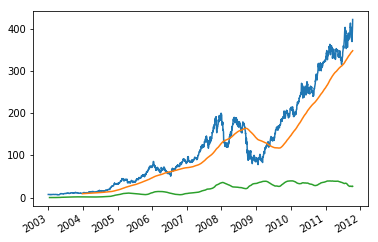

In [69]:
# 移动窗口函数
close_px_all = pd.read_csv('E:\\useFiles\\examples\\stock_px_2.csv', parse_dates=True, index_col=0)
close_px=close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px.resample('B').ffill()
close_px.AAPL.plot()
close_px.AAPL.rolling(250).mean().plot()

appl_std250=close_px.AAPL.rolling(250, min_periods=10).std()
appl_std250[5:12]
appl_std250.plot()

In [88]:
# 计算扩展窗口平均，可以使用expanding
# appl_std250.expanding().mean()

In [84]:
df = pd.DataFrame({'1': ['A1', 'A2', 'A1', 'A2', 'A2', 'A1', 'A2'],'2': ['B1', 'B1', 'B1', 'B1', 'B1', 'B1', 'B1'],'num': [1,2,1,3,4,2,1]}, 
                  index =pd.date_range('20130101 09:00:00', periods=7, freq='S'))
print(df)
df.groupby(['1', '2'])['num'].rolling('3s').sum()

                      1   2  num
2013-01-01 09:00:00  A1  B1    1
2013-01-01 09:00:01  A2  B1    2
2013-01-01 09:00:02  A1  B1    1
2013-01-01 09:00:03  A2  B1    3
2013-01-01 09:00:04  A2  B1    4
2013-01-01 09:00:05  A1  B1    2
2013-01-01 09:00:06  A2  B1    1


1   2                      
A1  B1  2013-01-01 09:00:00    1.0
        2013-01-01 09:00:02    2.0
        2013-01-01 09:00:05    2.0
A2  B1  2013-01-01 09:00:01    2.0
        2013-01-01 09:00:03    5.0
        2013-01-01 09:00:04    7.0
        2013-01-01 09:00:06    5.0
Name: num, dtype: float64

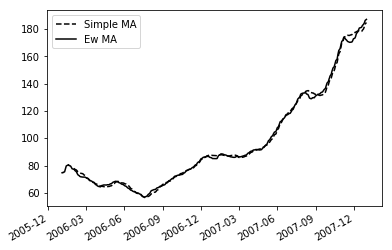

In [109]:
# 指数加权函数
# import matplotlib.pyplot as plt
aapl_px = close_px.AAPL['2006':'2007']
ma60=aapl_px.rolling(30, min_periods=20).mean()
ewma60=aapl_px.ewm(span=30).mean()
ma60.plot(style='k--', label='Simple MA')
ewma60.plot(style='k-', label='Ew MA')
plt.legend()

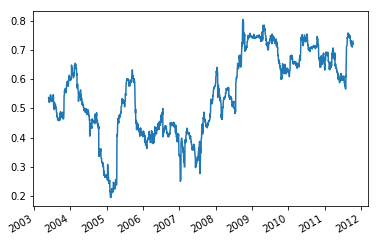

In [116]:
# 二元移动窗口函数
spx_px=close_px_all['SPX']
spx_rets=spx_px.pct_change()
returns=close_px.pct_change()
# 计算某只股票与标普500指数的相关系数：调用rolling，corr聚合函数开始计算与spx_rets滚动相关系数
corr=returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()
# 计算多只股票与标普500的相关系数，只需传入一个TimeSeries（本例中就是spx_rets）和一个DataFrame
# returns.rolling(125, min_periods=100).corr(spx_rets)


D:\Program\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  """


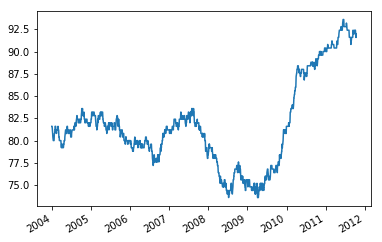

In [119]:
# 用户定义的移动窗口函数
# 用rolling(...).quantile(q)计算样本分位数时，可能对样本中特定值的百分等级感兴趣，运用scipy.stats.percentileofscore函数
from scipy.stats import percentileofscore
score_at_2percent = lambda x: percentileofscore(x, 0.02)
returns.AAPL.rolling(250).apply(score_at_2percent).plot()